<a href="https://colab.research.google.com/github/prnvvv/Machine-Learning/blob/main/WineQualityDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [171]:
dataFrame = pd.read_csv("winequality.csv")

In [172]:
pd.set_option('display.max_columns', None)


In [173]:
dataFrame

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [174]:
label = LabelEncoder()
dataFrame["type_encoded"] = label.fit_transform(dataFrame["type"])

In [175]:
dataFrame.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_encoded
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378,0.753886
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [176]:
dataFrame.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_encoded             0
dtype: int64

In [177]:
dataFrame["fixed acidity"].value_counts()

fixed acidity
6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: count, Length: 106, dtype: int64

In [178]:
dataFrame["fixed acidity"] = dataFrame["fixed acidity"].fillna(6.80)
dataFrame["volatile acidity"] = dataFrame["volatile acidity"].fillna(0.280)

In [179]:
dataFrame.dropna(axis = 0, inplace=True)

In [180]:
features = dataFrame.columns.drop(["type", "quality"])
X = dataFrame[features]
y = dataFrame["quality"]

<Axes: >

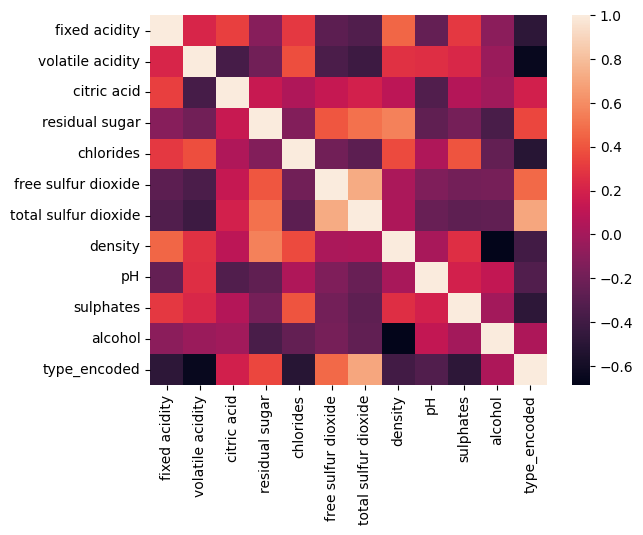

In [181]:
sns.heatmap(X.corr())

In [182]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [183]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [184]:
DTC_model = RandomForestRegressor(random_state=1)
DTC_model.fit(train_X, train_y)
predictions = DTC_model.predict(test_X)


In [185]:
print(f"R2_score: {r2_score(test_y, predictions): .2f}")



R2_score:  0.48


In [186]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, random_state=42)
model.fit(train_X, train_y)
predictions = model.predict(test_X)

In [187]:
print(f"R2_score: {r2_score(test_y, predictions): .2f}")

R2_score:  0.38


In [188]:
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.2, random_state=42)
model.fit(train_X, train_y)
predictions = model.predict(test_X)

In [189]:
print(f"R2_score: {r2_score(test_y, predictions): .2f}")

R2_score:  0.47


In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import sgd
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [201]:
model = Sequential()
model.add(Dense(200, activation='relu', input_dim=train_X.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))

In [204]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [205]:
model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/100
162/162 [==============================] - 1s 5ms/step - loss: -73.6266 - accuracy: 0.0000e+00 - val_loss: -72.9045 - val_accuracy: 0.0000e+00
Epoch 2/100
162/162 [==============================] - 1s 4ms/step - loss: -73.6266 - accuracy: 0.0000e+00 - val_loss: -72.9045 - val_accuracy: 0.0000e+00
Epoch 3/100
162/162 [==============================] - 1s 3ms/step - loss: -73.6266 - accuracy: 0.0000e+00 - val_loss: -72.9045 - val_accuracy: 0.0000e+00
Epoch 4/100
162/162 [==============================] - 0s 3ms/step - loss: -73.6266 - accuracy: 0.0000e+00 - val_loss: -72.9045 - val_accuracy: 0.0000e+00
Epoch 5/100
162/162 [==============================] - 0s 3ms/step - loss: -73.6266 - accuracy: 0.0000e+00 - val_loss: -72.9045 - val_accuracy: 0.0000e+00
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: -73.6266 - accuracy: 0.0000e+00 - val_loss: -72.9045 - val_accuracy: 0.0000e+00
Epoch 7/100
162/162 [==============================] - 0s 3ms/step - l